In [32]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [33]:
#Read cleaned csv file
df = pd.read_csv("../data_cleaning/OSMI_clean.csv")
df.head()

,tech company,employer provided healthcare with mental benefits,employer provided mental healthcare awareness,current mental health disorder,mental health diagnosis,family history of mental illness,discussed personal mental health with employer,anonymity protected when using benefits,ease of asking for leave,comfortable discussing a mental health issue with direct supervisor(s),comfortable discussing a mental health issue with coworkers,Number of employees,how well do you think the tech industry supports employees with mental health issues,observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace,Age,Gender,Country of residence,Race,year
0,1.0,No,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Yes,Yes,100-500,1.0,"Yes, I experienced","Yes, I experienced",27.0,Female,United Kingdom,NaN,2017
1,1.0,Yes,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Maybe,Yes,100-500,2.0,"Yes, I observed",Maybe/Not sure,31.0,male,United Kingdom,NaN,2017
2,1.0,I don't know,No,Yes,Yes,Yes,1.0,Yes,Difficult,Yes,Maybe,6-25,1.0,"Yes, I experienced","Yes, I experienced",36.0,male,United States of America,White,2017
3,1.0,Yes,Yes,Yes,Yes,I don't know,1.0,Yes,Difficult,Yes,Yes,More than 1000,2.0,Maybe/Not sure,Maybe/Not sure,22.0,Male,United States of America,White,2017
4,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,No,"Yes, I observed",52.0,female,United States of America,More than one of the above,2017


In [34]:
#filter for only tech companies first
df = df[df["tech company"]=="1.0"]
#create two dataframes for plotting by narrowing down df to necessary columns
df_anonymity = df[["current mental health disorder","anonymity protected when using benefits"]]
df_leave = df[["current mental health disorder","ease of asking for leave"]]
print(df_anonymity.head())
print(df_leave.head())

  current mental health disorder anonymity protected when using benefits
0                       Possibly                            I don't know
1                       Possibly                            I don't know
2                            Yes                                     Yes
3                            Yes                                     Yes
5                             No                                     Yes
  current mental health disorder ease of asking for leave
0                       Possibly             I don't know
1                       Possibly             I don't know
2                            Yes                Difficult
3                            Yes                Difficult
5                             No            Somewhat easy


In [35]:
#drop rows with missing data and rows where current mental health disorder is I don't know
df_anonymity = df_anonymity.dropna()
df_leave = df_leave.dropna()
df_anonymity = df_anonymity[(df_anonymity["current mental health disorder"]!="Don't Know")]
df_leave = df_leave[(df_leave["current mental health disorder"]!="Don't Know")]

In [36]:
#Create 2 new dataframes with indexes as the columns of df_anonymity nd df_leave and the column as value counts
anonymity_groupby = df_anonymity.groupby("anonymity protected when using benefits")["current mental health disorder"].value_counts()
anonymity_groupby_df = pd.DataFrame(anonymity_groupby)
leave_groupby = df_leave.groupby("ease of asking for leave")["current mental health disorder"].value_counts()
leave_groupby_df = pd.DataFrame(leave_groupby)
print(leave_groupby_df)

                                                           count
ease of asking for leave   current mental health disorder       
Difficult                  Yes                                39
                           Possibly                           20
                           No                                 15
I don't know               Yes                                60
                           No                                 46
                           Possibly                           34
Neither easy nor difficult No                                 40
                           Yes                                40
                           Possibly                           32
Somewhat difficult         Yes                                33
                           Possibly                           30
                           No                                 25
Somewhat easy              Yes                               122
                         

In [37]:
#calculate percentages for each value in the group for disply
#code for calculating percentage of group
#https://stackoverflow.com/questions/75090908/pandas-matplotlib-bar-plot-with-multi-index-dataframe
anonymity_groupby_df["percent of group"] = (anonymity_groupby_df
                                            .groupby(by="anonymity protected when using benefits",group_keys=False)
                                            .apply(lambda anonymity_groupby_df: anonymity_groupby_df / anonymity_groupby_df.sum() * 100))

leave_groupby_df["percent of group"] = (leave_groupby_df
                                        .groupby(by="ease of asking for leave",group_keys=False)
                                        .apply(lambda leave_groupby_df: leave_groupby_df / leave_groupby_df.sum() * 100))
leave_groupby_df

count  \
ease of asking for leave   current mental health disorder          
Difficult                  Yes                                39   
                           Possibly                           20   
                           No                                 15   
I don't know               Yes                                60   
                           No                                 46   
                           Possibly                           34   
Neither easy nor difficult No                                 40   
                           Yes                                40   
                           Possibly                           32   
Somewhat difficult         Yes                                33   
                           Possibly                           30   
                           No                                 25   
Somewhat easy              Yes                               122   
                           No                                 76   
                           Possibly                           41   
Very easy                  No                                 91   
                           Yes                                81   
                           Possibly                           34   

                                                           percent of group  
ease of asking for leave   current mental health disorder                    
Difficult                  Yes                                    52.702703  
                           Possibly                               27.027027  
                           No                                     20.270270  
I don't know               Yes                                    42.857143  
                           No                                     32.857143  
                           Possibly                               24.285714  
Neither easy nor difficult No                                     35.714286  
                           Yes                                    35.714286  
                           Possibly                               28.571429  
Somewhat difficult         Yes                                    37.500000  
                           Possibly                               34.090909  
                           No                                     28.409091  
Somewhat easy              Yes                                    51.046025  
                           No                                     31.799163  
                           Possibly                               17.154812  
Very easy                  No                                     44.174757  
                           Yes                                    39.320388  
                           Possibly                               16.504854

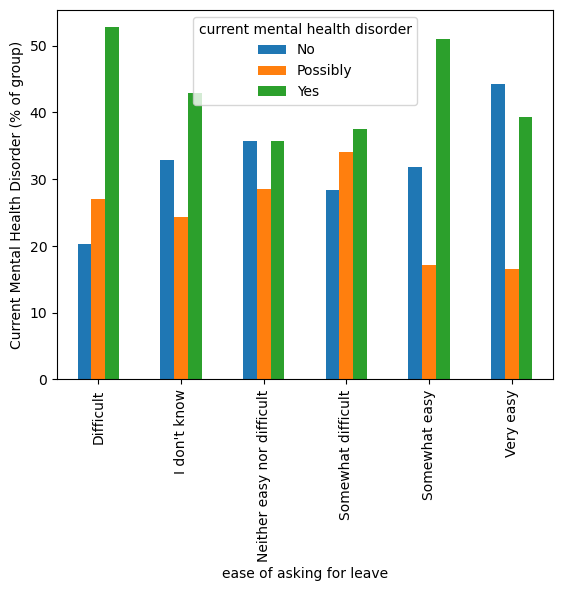

In [38]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for ease of asking for leave by percentage of group
leave_groupby_df["percent of group"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (% of group)")
plt.savefig("ease_of_asking_leave_group_percent.png", bbox_inches='tight')


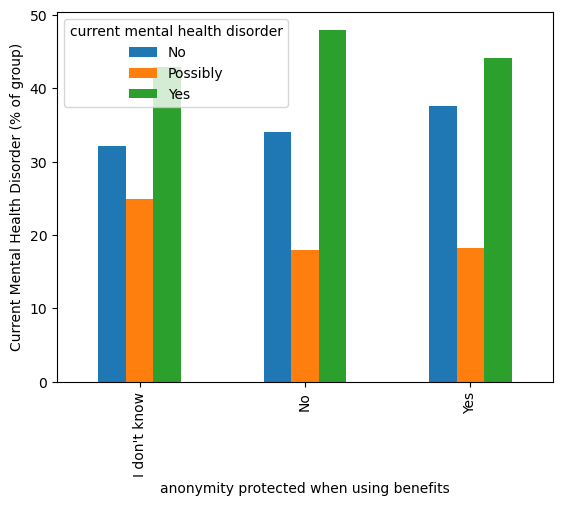

In [39]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for ease of asking for leave
anonymity_groupby_df["percent of group"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (% of group)")
plt.savefig("anonymity_protected_bar_group_percent.png", bbox_inches='tight')

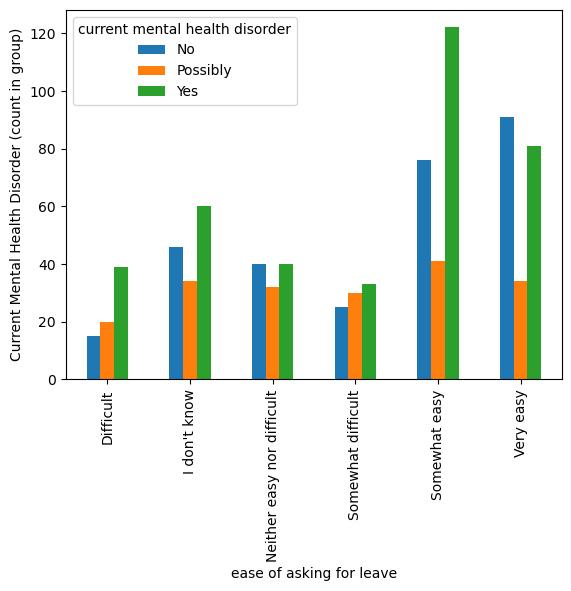

In [40]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for ease of asking for leave by count in group
leave_groupby_df["count"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (count in group)")
plt.savefig("ease_of_asking_leave_group_count.png", bbox_inches='tight')

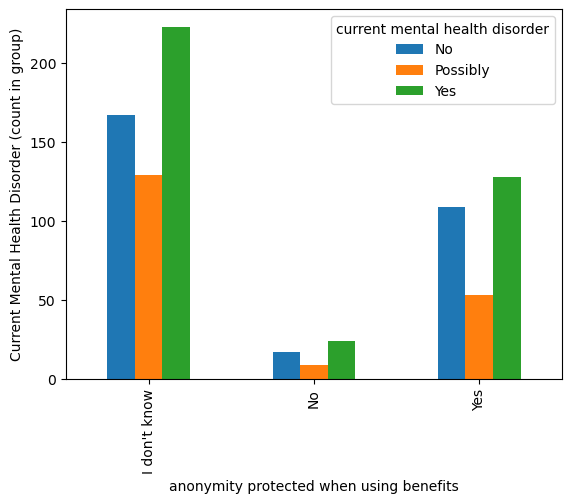

In [41]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for ease of asking for leave
anonymity_groupby_df["count"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (count in group)")
plt.savefig("anonymity_protected_bar_group_count.png", bbox_inches='tight')